In [1]:
from numpy import *
from scipy.stats import norm
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
    t = 0
    
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))
    d2 = d1-sigma*math.sqrt(T-t)
    
    c = norm.cdf(d1)*S0-norm.cdf(d2)*K*np.exp(-r*(T-t))
    p = norm.cdf(-d2)*K*np.exp(-r*(T-t))-norm.cdf(-d1)*S0
    
    
    
    return c, p

In [4]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps+1,numPaths))
    dT = T/numSteps
    paths[0,:] = S0
    for i in range(numPaths):
        for j in range(numSteps):
            paths[j+1, i] = paths[j,i] * np.exp((mu-0.5*sigma**2)*dT + sigma*np.sqrt(dT)*np.random.normal(0,1))
    
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)
    
    for i in range(numPaths):
        call[i] = np.maximum(paths[numSteps,i] - K,0) * np.exp(-r*T)
        put[i] = np.maximum(K - paths[numSteps,i],0) * np.exp(-r*T)
        
    
    c = np.mean(call)
    p = np.mean(put)
    
    return c, p, paths

In [5]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    
    paths = np.zeros((numSteps+1,numPaths))
    dT = T/numSteps
    paths[0,:] = S0
    for i in range(numPaths):
        for j in range(numSteps):
            paths[j+1, i] = paths[j,i] * np.exp((mu-0.5*sigma**2)*dT + sigma*np.sqrt(dT)*np.random.normal(0,1))
    
    
    
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)    
    
    determine = sum((paths>=Sb),axis = 0)
    
    for i in range(numPaths):
        if determine[i] > 0:
            call[i] = np.maximum(paths[numSteps,i] - K,0) * np.exp(-r*T)
            put[i] = np.maximum(K - paths[numSteps,i],0) * np.exp(-r*T)
        else:
            call[i] = 0
            put[i] = 0
    
    c = np.mean(call)
    p = np.mean(put)        
            
        
    
    return c, p

In [6]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 252;
numPaths = 10000;

In [7]:
# paths = np.zeros((5,10000))
# dT = T/numSteps
# paths[0,:] = S0
# for i in range(10000):
#     for j in range(4):
#         paths[j+1, i] = paths[j,i] * np.exp((mu-0.5*sigma**2)*dT + sigma*np.sqrt(dT)*np.random.normal(0,1))

In [8]:
# call = np.zeros(numPaths)
# put = np.zeros(numPaths)    

# determine = sum((paths>=Sb),axis = 0)
    
# for i in range(10000):
#     if determine[i] > 0:
#         call[i] = np.maximum(paths[1,i] - K,0) * np.exp(-r*T)
#         put[i] = np.maximum(K - paths[1,i],0) * np.exp(-r*T)
#         print(call[i])
#         print((put[i]))
#         print('\n')
#     else:
#         call[i] = 0
#         put[i] = 0
# c = np.mean(call)
# p = np.mean(put)  

In [9]:
# determine = sum((paths>=Sb),axis = 0)

In [10]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)


In [11]:
# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, pathone = MC_european_price(S0, K, T, r, mu, sigma, 1, 10000)

In [12]:
# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, pathmul = MC_european_price(S0, K, T, r, mu, sigma, numSteps, 10000)


In [13]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, 10000)


In [14]:
# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, 10000)

In [15]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 7.925328813409936
One-step MC price of an European put option is 7.891700499207624
Multi-step MC price of an European call option is 7.981547527751872
Multi-step MC price of an European put option is 7.869439933528049
One-step MC price of an Barrier call option is 7.873464448140768
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.04292700403084
Multi-step MC price of an Barrier put option is 1.9705521373225081


In [90]:
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, 10000)
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, 10000)
print('One-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option with 10% increased volatility is 8.748044668473986
One-step MC price of an Barrier put option with 10% increased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% increased volatility is 8.704904889163371
Multi-step MC price of an Barrier put option with 10% increased volatility is 2.48833061345639


In [91]:
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, 10000)
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, 10000)
print('One-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option with 10% decreased volatility is 6.993944345144349
One-step MC price of an Barrier put option with 10% decreased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% decreased volatility is 7.272112473688663
Multi-step MC price of an Barrier put option with 10% decreased volatility is 1.6000205336093984


Text(0, 0.5, 'Price')

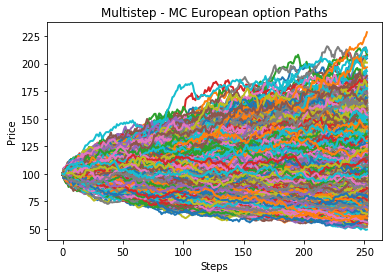

In [92]:
[plt.plot(pathmul[:,i], linewidth=2) for i in range(10000)]
plt.title('Multistep - MC European option Paths')
plt.xlabel('Steps')
plt.ylabel('Price')

In [40]:
numPathsList = [100,500,1000,5000,10000,20000,30000,40000,50000,100000]
numStepsList = [1 ,2, 12, 24, 252]
step_path = np.zeros((len(numStepsList), len(numPathsList)))
call_residual = np.zeros((len(numStepsList), len(numPathsList)))
put_residual = np.zeros((len(numStepsList), len(numPathsList)))

In [41]:
for i in range(len(numPathsList)):
    for j in range(len(numStepsList)):
        call, put, pathse = MC_european_price(S0, K, T, r, mu, sigma, numStepsList[j], numPathsList[i])
        call_residual[j,i] = abs(call-call_BS_European_Price)
        put_residual[j,i] = abs(put-putBS_European_Price)
        step_path[j,i] = call_residual[j,i]+put_residual[j,i]

In [64]:
print('For a Monti-Carlo European option closest to the Black-Scholes formula')
x,y = list(np.argwhere(call_residual ==call_residual.min())[0])
print('For an optimal call option the number of steps = %d and the number of paths = %d' %(numStepsList[x],numPathsList[y]))
x,y = list(np.argwhere(put_residual ==put_residual.min())[0])
print('For an optimal put option the number of steps = %d and the number of paths = %d' %(numStepsList[x],numPathsList[y]))

For a Monti-Carlo European option closest to the Black-Scholes formula
For an optimal call option the number of steps = 12 and the number of paths = 50000
For an optimal put option the number of steps = 2 and the number of paths = 100000


In [87]:
print('For a Monti-Carlo European option nearest to the cent of a Black-Scholes formula\n')
x = list(np.argwhere(put_residual <= 1e-2))
print('For a put option closest to the nearest cent:')
for i in range(len(x)):
    print('The number of steps = %d and the number of paths = %d' %(numStepsList[x[i][0]], numPathsList[x[i][1]]))


print('\n')
print('For a call option closest to the nearest cent:')
x = list(np.argwhere(call_residual <= 1e-2))
for i in range(len(x)):
    print('The number of steps = %d and the number of paths = %d' %(numStepsList[x[i][0]], numPathsList[x[i][1]]))

    
print('\n')
print('For an absolute least value between the call and put value:')
x,y = list(np.argwhere(step_path == step_path.min())[0])
print('The number of steps = %d and the number of paths = %d' %(numStepsList[x],numPathsList[y]))

For a Monti-Carlo European option nearest to the cent of a Black-Scholes formula

For a put option closest to the nearest cent:
The number of steps = 2 and the number of paths = 500
The number of steps = 2 and the number of paths = 40000
The number of steps = 2 and the number of paths = 100000
The number of steps = 12 and the number of paths = 40000
The number of steps = 24 and the number of paths = 100000


For a call option closest to the nearest cent:
The number of steps = 12 and the number of paths = 50000


For an absolute least value between the call and put value:
The number of steps = 12 and the number of paths = 50000
